In [8]:
import warnings
warnings.filterwarnings('ignore')

##Reading Image Data in Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
%matplotlib inline
from skimage.io import imread, imshow

###Grayscale Pixel Values as Features

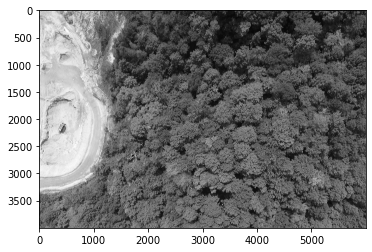

In [ ]:
img1 = cv.imread('/content/IX-01-61737_0029_0003.JPG')
image = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')

###Mean Pixel Value of Channels

In [ ]:
image.shape, image

((4000, 6000), array([[203, 195, 204, ...,  51,  41,  42],
        [202, 199, 203, ...,  48,  42,  43],
        [194, 192, 194, ...,  48,  46,  44],
        ...,
        [140, 132, 138, ..., 121, 119, 113],
        [116, 115, 134, ..., 112, 113, 106],
        [115, 131, 142, ..., 107, 101, 105]], dtype=uint8))

In [ ]:
pixel_feat1 = np.reshape(image, (4000 * 6000))
pixel_feat1

array([203, 195, 204, ..., 107, 101, 105], dtype=uint8)

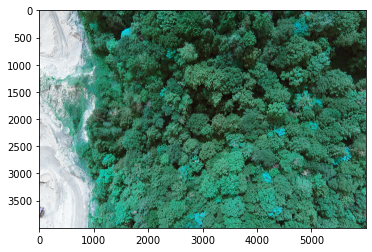

In [ ]:
image = cv.imread('/content/IX-01-61737_0029_0004.JPG')
plt.imshow(image)

In [ ]:
image.shape

(4000, 6000, 3)

###Feature Extraction
####Pixel Features

In [ ]:
pixel_feat2 = np.reshape(image, (4000 * 6000 * 3))
pixel_feat2

array([219, 228, 231, ...,  37,  72,  46], dtype=uint8)

###Edge Features

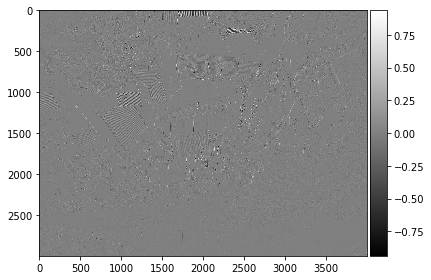

In [ ]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread('/content/IMG_7736.JPG',as_gray=True)
# imshow(image)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

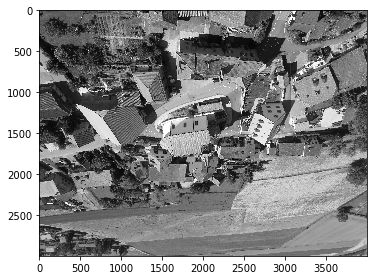

In [ ]:
image = imread('/content/IMG_7736.JPG',as_gray=True)
imshow(image)

***Original image***

In [ ]:
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 30.6MB 142kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
from skimage import filters
from skimage.io import imread, imshow
import cv2

image = imread('/content/IMG_7736.JPG', as_gray=True)
# prewitt kernel
pre_hor = prewitt_h(image)
pre_ver = prewitt_v(image)

# Sobel Kernel
ed_sobel = filters.sobel(image)

####Prewitt Kernel

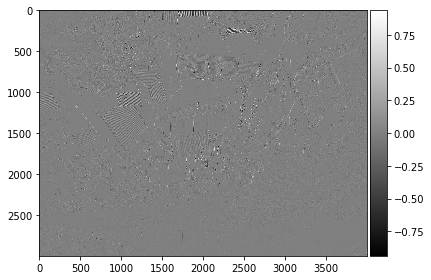

In [ ]:
imshow(pre_ver, cmap='gray')

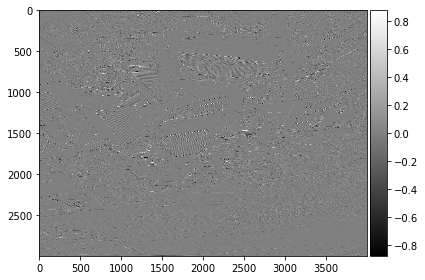

In [ ]:
imshow(pre_hor, cmap='gray')

####Sobel Kernel

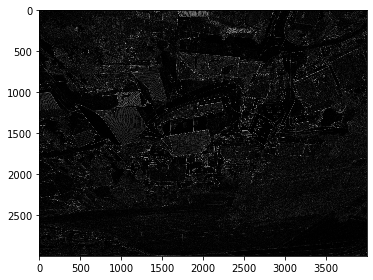

In [ ]:
imshow(ed_sobel, cmap='gray')

####Canny Algorithm

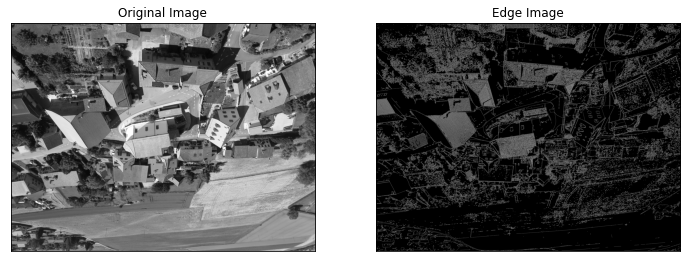

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/IMG_7736.JPG',0)
edges = cv2.Canny(img,100,200)

plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

###Region-Based Segmentation

Text(0.5, 1.0, 'histogram of gray values')

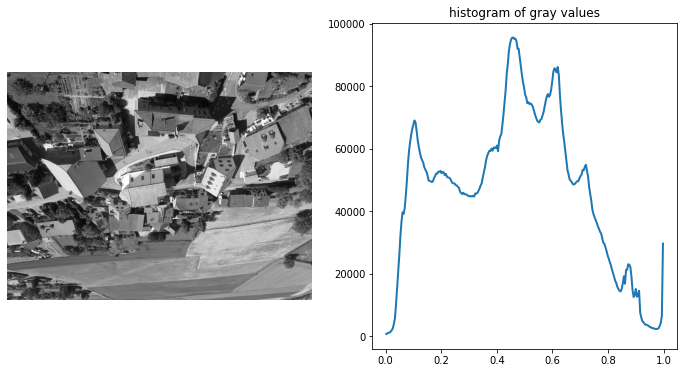

In [ ]:
from skimage.exposure import histogram
hist, hist_centers = histogram(image)

#Plotting the Image and the Histogram of gray values
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

In [ ]:
import skimage
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

image = imread('/content/IMG_7755.JPG')

from skimage.filters import threshold_otsu 
 
threshold_value = threshold_otsu(image)  
img_threholded = image > threshold_value 
 
# Show the original image
plt.imshow(image)
plt.show()

# Show the thresholded image
plt.imshow(img_threholded)
plt.show()

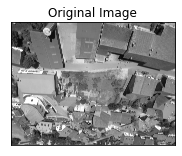

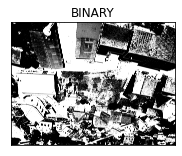

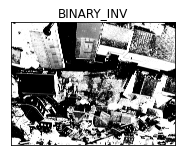

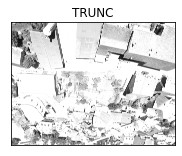

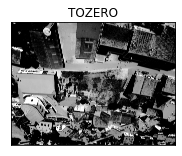

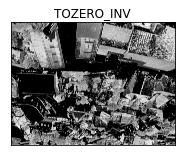

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/IMG_7755.JPG',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.figure(figsize=(10,8))
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

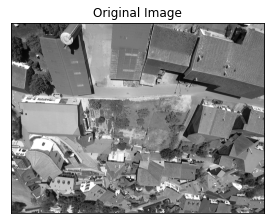

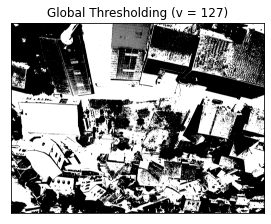

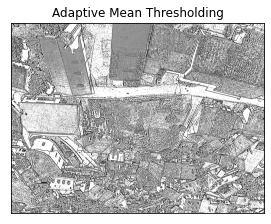

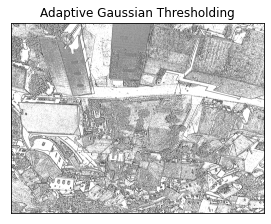

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/IMG_7755.JPG',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

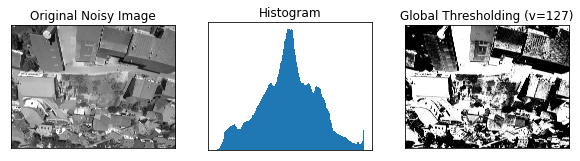

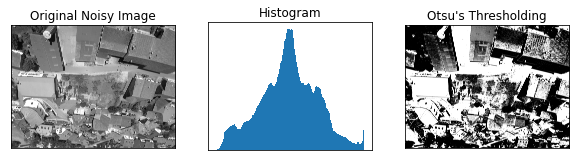

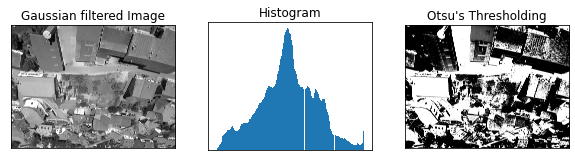

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/IMG_7755.JPG',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.figure(figsize=(10,8))
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
img = cv2.imread('/content/IMG_7755.JPG',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

130 129.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


##Another method of Feature Extraction

In [ ]:
import numpy as np                     # numeric python lib

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality

# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)

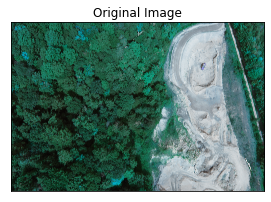

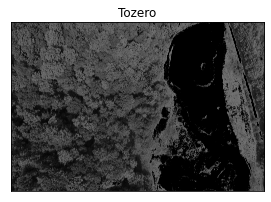

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/IX-01-61737_0029_0016.JPG')
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

cv2.imwrite('New.JPG', thresh)
titles = ['Original Image', 'Tozero']
images = [img, thresh]

for i in range(2):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

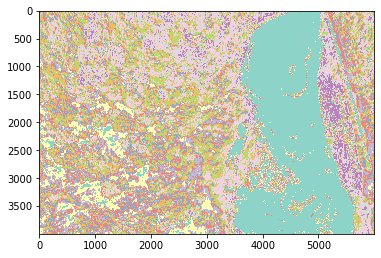

In [ ]:
img = mpimg.imread('/content/New.JPG')

# using image processing module of scipy to find the center of the image
# cy, cx = ndi.center_of_mass(img)

plt.imshow(img, cmap='Set3')  
# plt.scatter(cx, cy)           
plt.show()

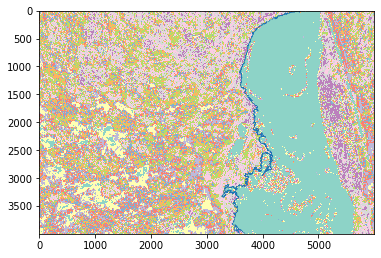

In [ ]:
import cv2

img = cv2.imread('/content/New.JPG',0)
contours = measure.find_contours(img, .8)

# from which we choose the longest one
contour = max(contours, key=len)

# let us see the contour that we hopefully found
plt.plot(contour[::,1], contour[::,0], linewidth=0.5)
plt.imshow(img, cmap='Set3')
plt.show()

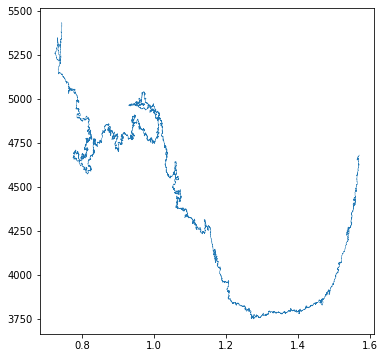

In [ ]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
plt.plot(polar_contour[::,1], polar_contour[::,0], linewidth=0.5)
plt.show()

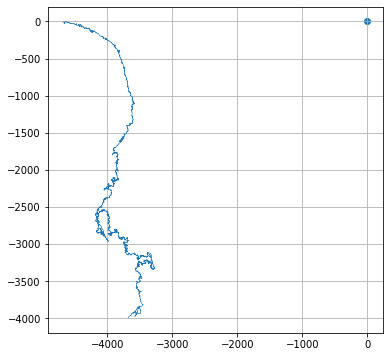

In [ ]:
plt.plot(-contour[::,1], -contour[::,0], linewidth=0.5)
plt.grid()
plt.scatter(0, 0)
plt.show()

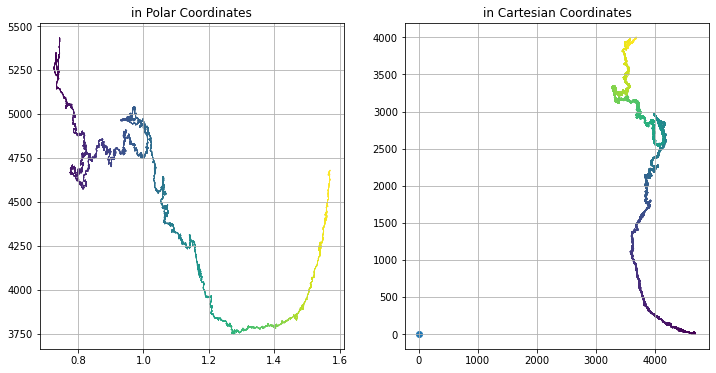

In [ ]:
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
rcParams['figure.figsize'] = (12, 6)
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=.5, c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()
plt.subplot(122)
plt.scatter(contour[::,1],             # x axis is radians
            contour[::,0],             # y axis is distance from center
            linewidth=0, s=2,          # small points, w/o borders
            c=range(len(contour)))     # continuous coloring (so that plots match)
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()
plt.show()

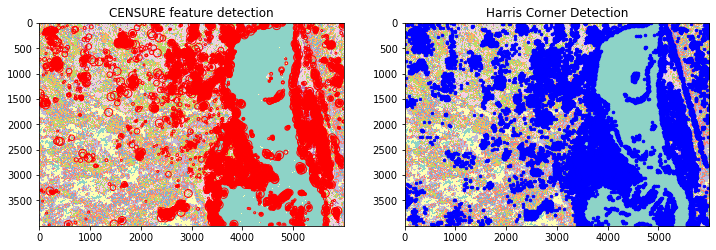

In [ ]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

detector = CENSURE()
detector.detect(img)

coords = corner_peaks(corner_harris(img), min_distance=5)
coords_subpix = corner_subpix(img, coords, window_size=13)

plt.subplot(121)
plt.title('CENSURE feature detection')
plt.imshow(img, cmap='Set3')
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')

plt.subplot(122)
plt.title('Harris Corner Detection')
plt.imshow(img, cmap='Set3')  # show me the leaf
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
plt.show()

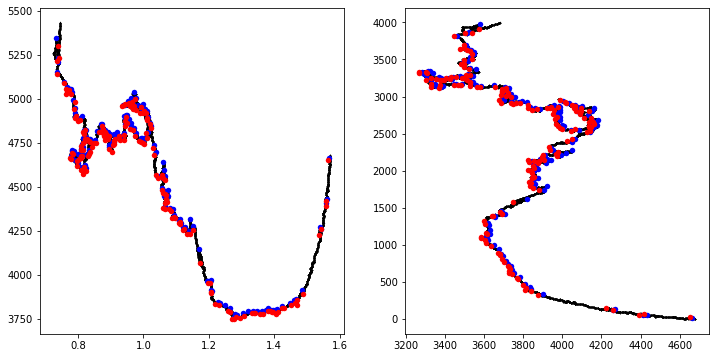

In [ ]:
from scipy.signal import argrelextrema

# for local maxima
c_max_index = argrelextrema(polar_contour[::,0], np.greater, order=50)
c_min_index = argrelextrema(polar_contour[::,0], np.less, order=50)

plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(polar_contour[::,1][c_max_index], 
            polar_contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(polar_contour[::,1][c_min_index], 
            polar_contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.subplot(122)
plt.scatter(contour[::,1], contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(contour[::,1][c_max_index], 
            contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(contour[::,1][c_min_index], 
            contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.show()

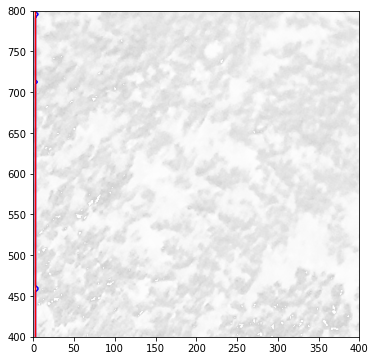

In [ ]:
def cont(img):
    return max(measure.find_contours(img, .8), key=len)

# let us set the 'brush' to a 6x6 circle
struct = [[ 0., 0., 1., 1., 0., 0.],
          [ 0., 1., 1., 1., 1., 0.],  
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 0., 1., 1., 1., 1., 0.],
          [ 0., 0., 1., 1., 0., 0.]]

erosion = cont(ndi.morphology.binary_erosion(img, structure=struct).astype(img.dtype))
closing = cont(ndi.morphology.binary_closing(img, structure=struct).astype(img.dtype))
opening = cont(ndi.morphology.binary_opening(img, structure=struct).astype(img.dtype))
# dilation = cont(ndi.morphology.binary_dilation(img, structure=struct).astype(img.dtype))

plt.imshow(img.T, cmap='Greys', alpha=.2)
plt.plot(erosion[::,0], erosion[::,1], c='b')
plt.plot(opening[::,0], opening[::,1], c='g')
plt.plot(closing[::,0], closing[::,1], c='r')
# plt.plot(dilation[::,0], dilation[::,1], c='k')
#plt.xlim([220, 420])
#plt.ylim([250, 420])
plt.xlim([0, 400])
plt.ylim([400, 800])
plt.show()

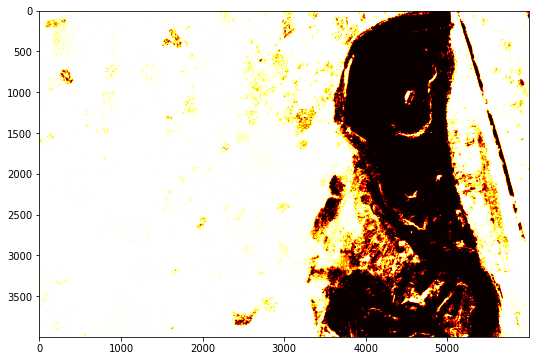

In [ ]:
plt.imshow(img.astype(bool).astype(float), cmap='hot')
plt.show()

##Using the same process on any arbitrary item such as a 'Leaf'

In [ ]:
# imports
import numpy as np                     # numeric python lib

import matplotlib.image as mpimg       # reading images to numpy arrays
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.patches as mpatches  # to draw a circle at the mean contour

from skimage import measure            # to find shape contour
import scipy.ndimage as ndi            # to determine shape centrality


# matplotlib setup
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)

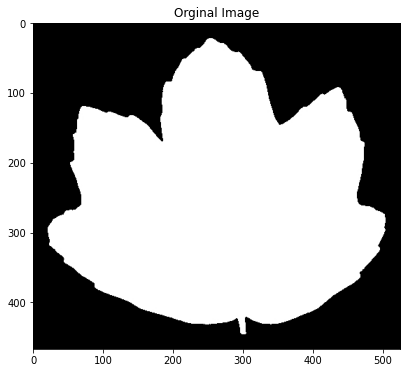

In [ ]:
import cv2
import matplotlib.pyplot as plt

Org_Img = cv2.imread('/content/images/1.jpg')

plt.title("Orginal Image")
plt.imshow(Org_Img)

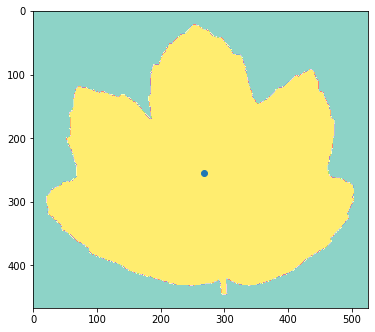

In [ ]:
# reading an image file using matplotlib into a numpy array
img = mpimg.imread('/content/images/1.jpg')

# using image processing module of scipy to find the center of the leaf
cy, cx = ndi.center_of_mass(img)

plt.imshow(img, cmap='Set3')  # show me the leaf
plt.scatter(cx, cy)           # show me its center
plt.show()

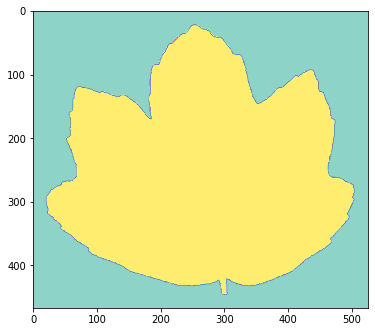

In [ ]:
# scikit-learn imaging contour finding, returns a list of found edges
contours = measure.find_contours(img, .8)

# from which we choose the longest one
contour = max(contours, key=len)

# let us see the contour that we hopefully found
plt.plot(contour[::,1], contour[::,0], linewidth=0.5)  
plt.imshow(img, cmap='Set3')
plt.show()

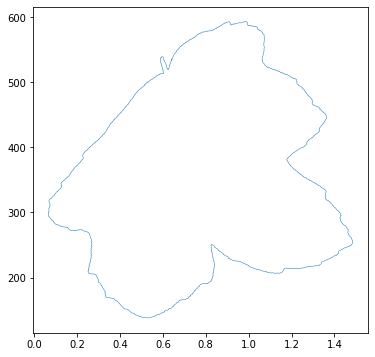

In [ ]:
# cartesian to polar coordinates, just as the image shows above
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
plt.plot(polar_contour[::,1], polar_contour[::,0], linewidth=0.5)
plt.show()

In [ ]:
# numpy is smart and assumes the same about us
# if we substract a number from an array of numbers,
# it assumes that we wanted to substract from all members
contour[::,1] -= cx  # demean X
contour[::,0] -= cy  # demean Y

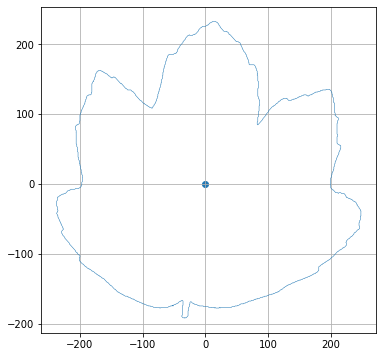

In [ ]:
# checking if we succeeded to move the center to (0,0)
plt.plot(-contour[::,1], -contour[::,0], linewidth=0.5)
plt.grid()
plt.scatter(0, 0)
plt.show()

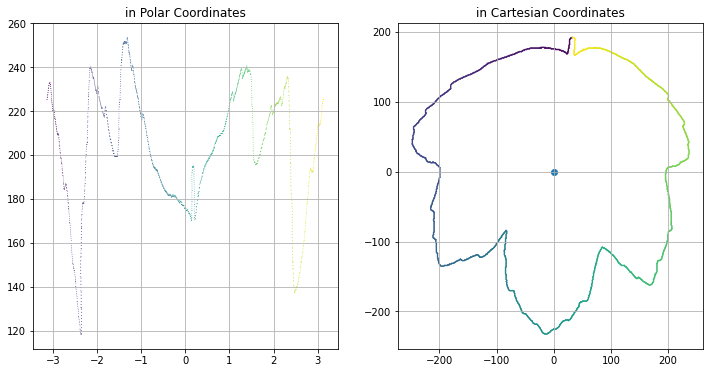

In [ ]:
# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
rcParams['figure.figsize'] = (12, 6)
plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], linewidth=0, s=.5, c=polar_contour[::,1])
plt.title('in Polar Coordinates')
plt.grid()
plt.subplot(122)
plt.scatter(contour[::,1],             # x axis is radians
            contour[::,0],             # y axis is distance from center
            linewidth=0, s=2,          # small points, w/o borders
            c=range(len(contour)))     # continuous coloring (so that plots match)
plt.scatter(0, 0)
plt.title('in Cartesian Coordinates')
plt.grid()
plt.show()

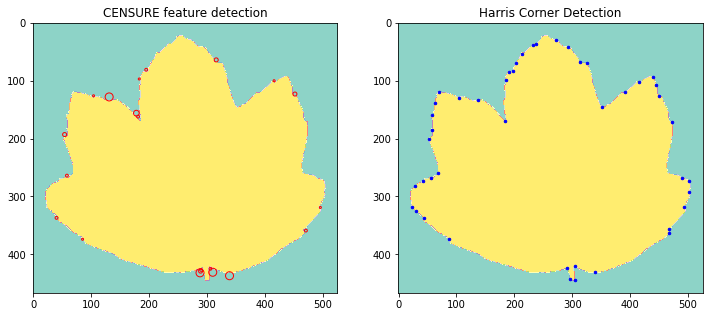

In [ ]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks, CENSURE

detector = CENSURE()
detector.detect(img)

coords = corner_peaks(corner_harris(img), min_distance=5)
coords_subpix = corner_subpix(img, coords, window_size=13)

plt.subplot(121)
plt.title('CENSURE feature detection')
plt.imshow(img, cmap='Set3')
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')

plt.subplot(122)
plt.title('Harris Corner Detection')
plt.imshow(img, cmap='Set3')  # show me the leaf
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=5)
plt.show()

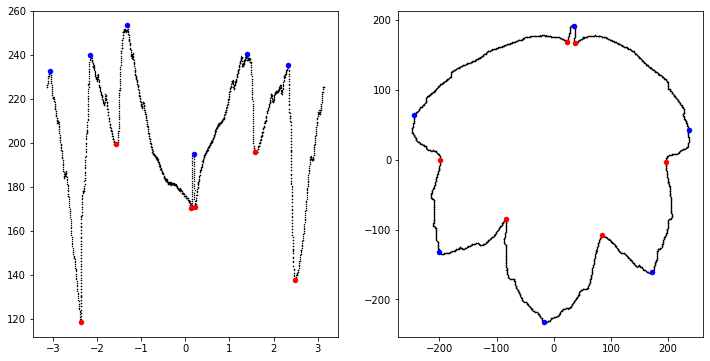

In [ ]:
from scipy.signal import argrelextrema

# for local maxima
c_max_index = argrelextrema(polar_contour[::,0], np.greater, order=50)
c_min_index = argrelextrema(polar_contour[::,0], np.less, order=50)

plt.subplot(121)
plt.scatter(polar_contour[::,1], polar_contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(polar_contour[::,1][c_max_index], 
            polar_contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(polar_contour[::,1][c_min_index], 
            polar_contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.subplot(122)
plt.scatter(contour[::,1], contour[::,0], 
            linewidth=0, s=2, c='k')
plt.scatter(contour[::,1][c_max_index], 
            contour[::,0][c_max_index], 
            linewidth=0, s=30, c='b')
plt.scatter(contour[::,1][c_min_index], 
            contour[::,0][c_min_index], 
            linewidth=0, s=30, c='r')

plt.show()

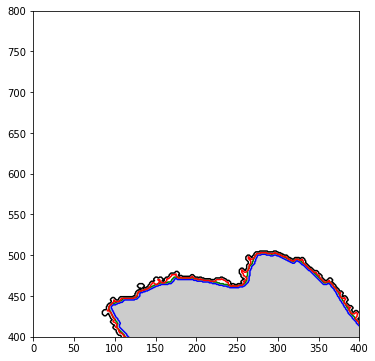

In [ ]:
def cont(img):
    return max(measure.find_contours(img, .8), key=len)

# let us set the 'brush' to a 6x6 circle
struct = [[ 0., 0., 1., 1., 0., 0.],
          [ 0., 1., 1., 1., 1., 0.],  
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 1., 1., 1., 1., 1., 1.], 
          [ 0., 1., 1., 1., 1., 0.],
          [ 0., 0., 1., 1., 0., 0.]]

erosion = cont(ndi.morphology.binary_erosion(img, structure=struct).astype(img.dtype))
closing = cont(ndi.morphology.binary_closing(img, structure=struct).astype(img.dtype))
opening = cont(ndi.morphology.binary_opening(img, structure=struct).astype(img.dtype))
dilation = cont(ndi.morphology.binary_dilation(img, structure=struct).astype(img.dtype))

plt.imshow(img.T, cmap='Greys', alpha=.2)
plt.plot(erosion[::,0], erosion[::,1], c='b')
plt.plot(opening[::,0], opening[::,1], c='g')
plt.plot(closing[::,0], closing[::,1], c='r')
plt.plot(dilation[::,0], dilation[::,1], c='k')
#plt.xlim([220, 420])
#plt.ylim([250, 420])
plt.xlim([0, 400])
plt.ylim([400, 800])
plt.show()

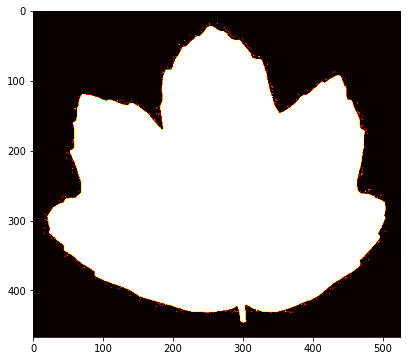

In [ ]:
plt.imshow(img.astype(bool).astype(float), cmap='hot')
plt.show()

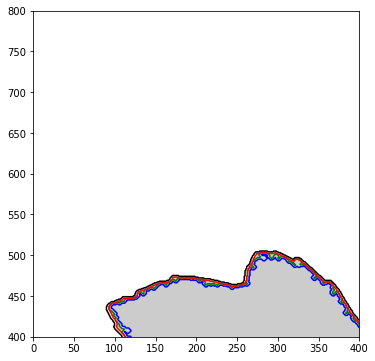

In [ ]:
erosion = cont(ndi.morphology.binary_erosion(img > 254, structure=struct).astype(img.dtype))
closing = cont(ndi.morphology.binary_closing(img > 254, structure=struct).astype(img.dtype))
opening = cont(ndi.morphology.binary_opening(img > 254, structure=struct).astype(img.dtype))
dilation = cont(ndi.morphology.binary_dilation(img > 254, structure=struct).astype(img.dtype))

plt.imshow(img.T, cmap='Greys', alpha=.2)
plt.plot(erosion[::,0], erosion[::,1], c='b')
plt.plot(opening[::,0], opening[::,1], c='g')
plt.plot(closing[::,0], closing[::,1], c='r')
plt.plot(dilation[::,0], dilation[::,1], c='k')
plt.xlim([0, 400])
plt.ylim([400, 800])
plt.show()

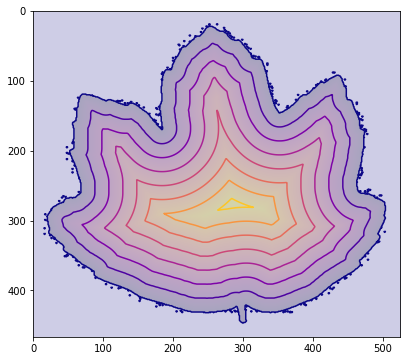

In [ ]:
dist_2d = ndi.distance_transform_edt(img)
plt.imshow(img, cmap='Greys', alpha=.2)
plt.imshow(dist_2d, cmap='plasma', alpha=.2)
plt.contour(dist_2d, cmap='plasma')
plt.show()

**We can see, that these Edge Detection Feature works better on some object than any Landscape (Aerial Dataset).**

This is due to the fact, that features of any objects are more prominient than that of some trees in a forest.

In [ ]:
import numpy as np

import scipy as sp
import scipy.ndimage as ndi
from scipy.signal import argrelextrema

import pandas as pd

from skimage import measure
from sklearn import metrics

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)

In [ ]:
# ----------------------------------------------------- I/O ---

def read_img(img_no):
    """reads image from disk"""
    return mpimg.imread('/content/images/' + str(img_no) + '.jpg')


def get_imgs(num):
    """convenience function, yields random sample from leaves"""
    if type(num) == int:
        imgs = range(1, 1584)
        num = np.random.choice(imgs, size=num, replace=False)
        
    for img_no in num:
        yield img_no, preprocess(read_img(img_no))

In [ ]:
# ----------------------------------------------------- preprocessing ---
from skimage.transform import resize

def threshold(img, threshold=250):
    """splits img to 0 and 255 values at threshold"""
    return ((img > threshold) * 255).astype(img.dtype)


def portrait(img):
    """makes all leaves stand straight"""
    y, x = np.shape(img)
    return img.transpose() if x > y else img
    

def resample(img, size):
    """resamples img to size without distorsion"""
    ratio = size / max(np.shape(img))
    return resize(img, ratio, mode='L')

    
def fill(img, size=500, tolerance=0.95):
    """extends the image if it is signifficantly smaller than size"""
    y, x = np.shape(img)

    if x <= size * tolerance:
        pad = np.zeros((y, int((size - x) / 2)), dtype=int)
        img = np.concatenate((pad, img, pad), axis=1)

    if y <= size * tolerance:
        pad = np.zeros((int((size - y) / 2), x), dtype=int)
        img = np.concatenate((pad, img, pad), axis=0) 
    
    return img

In [ ]:
# ----------------------------------------------------- postprocessing ---

def standardize(arr1d):
    """move mean to zero, 1st SD to -1/+1"""
    return (arr1d - arr1d.mean()) / arr1d.std()


def coords_to_cols(coords):
    """from x,y pairs to feature columns"""
    return coords[::,1], coords[::,0]


def get_contour(img):
    """returns the coords of the longest contour"""
    return max(measure.find_contours(img, .8), key=len)


def downsample_contour(coords, bins=512):
    """splits the array to ~equal bins, and returns one point per bin"""
    edges = np.linspace(0, coords.shape[0], 
                       num=bins).astype(int)
    for b in range(bins-1):
        yield [coords[edges[b]:edges[b+1],0].mean(), 
               coords[edges[b]:edges[b+1],1].mean()]


def get_center(img):
    """so that I do not have to remember the function ;)"""
    return ndi.measurements.center_of_mass(img)

In [ ]:
# ----------------------------------------------------- feature engineering ---

def extract_shape(img):
    """
    Expects prepared image, returns leaf shape in img format.
    The strength of smoothing had to be dynamically set
    in order to get consistent results for different sizes.
    """
    size = int(np.count_nonzero(img)/1000)
    brush = int(5 * size/size**.75)
    return ndi.gaussian_filter(img, sigma=brush, mode='nearest') > 200


def near0_ix(timeseries_1d, radius=5):
    """finds near-zero values in time-series"""
    return np.where(timeseries_1d < radius)[0]


def dist_line_line(src_arr, tgt_arr):
    """
    returns 2 tgt_arr length arrays, 
    1st is distances, 2nd is src_arr indices
    """
    return np.array(sp.spatial.cKDTree(src_arr).query(tgt_arr))


def dist_line_point(src_arr, point):
    """returns 1d array with distances from point"""
    point1d = [[point[0], point[1]]] * len(src_arr)
    return metrics.pairwise.paired_distances(src_arr, point1d)


def index_diff(kdt_output_1):
    """
    Shows pairwise distance between all n and n+1 elements.
    Useful to see, how the dist_line_line maps the two lines.
    """
    return np.diff(kdt_output_1)

In [ ]:
# ----------------------------------------------------- wrapping functions ---

# wrapper function for all preprocessing tasks    
def preprocess(img, do_portrait=True, do_resample=500, 
               do_fill=True, do_threshold=250):
    """ prepares image for processing"""
    if do_portrait:
        img = portrait(img)
    if do_resample:
        img = resample(img, size=do_resample)
    if do_fill:
        img = fill(img, size=do_resample)
    if do_threshold:
        img = threshold(img, threshold=do_threshold)
        
    return img


# wrapper function for feature extraction tasks
def get_std_contours(img):
    """from image to standard-length countour pairs"""
    
    # shape in boolean n:m format
    blur = extract_shape(img) 
    
    # contours in [[x,y], ...] format
    blade = np.array(list(downsample_contour(get_contour(img))))
    shape = np.array(list(downsample_contour(get_contour(blur))))
    
    # flagging blade points that fall inside the shape contour
    # notice that we are loosing subpixel information here
    blade_y, blade_x = coords_to_cols(blade)
    blade_inv_ix = blur[blade_x.astype(int), blade_y.astype(int)]
    
    # img and shape centers
    shape_cy, shape_cx = get_center(blur)
    blade_cy, blade_cx = get_center(img)
    
    # img distance, shape distance (for time series plotting)
    blade_dist = dist_line_line(shape, blade)
    shape_dist = dist_line_point(shape, [shape_cx, shape_cy])

    # fixing false + signs in the blade time series
    blade_dist[0, blade_inv_ix] = blade_dist[0, blade_inv_ix] * -1
    
    return {'shape_img': blur,
            'shape_contour': shape, 
            'shape_center': (shape_cx, shape_cy),
            'shape_series': [shape_dist, range(len(shape_dist))],
            'blade_img': img,
            'blade_contour': blade,
            'blade_center': (blade_cx, blade_cy),
            'blade_series': blade_dist,
            'inversion_ix': blade_inv_ix}
    

In [ ]:
import numpy as np
import cv2
import math
from scipy.spatial.distance import cdist, cosine
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt


class ShapeContext(object):

    def __init__(self, nbins_r=5, nbins_theta=12, r_inner=0.1250, r_outer=2.0):
        # number of radius zones
        self.nbins_r = nbins_r
        # number of angles zones
        self.nbins_theta = nbins_theta
        # maximum and minimum radius
        self.r_inner = r_inner
        self.r_outer = r_outer

    def _hungarian(self, cost_matrix):
        """
            Here we are solving task of getting similar points from two paths
            based on their cost matrixes. 
            This algorithm has dificulty O(n^3)
            return total modification cost, indexes of matched points
        """
        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        total = cost_matrix[row_ind, col_ind].sum()
        indexes = zip(row_ind.tolist(), col_ind.tolist())
        return total, indexes
    
    def get_points_from_img(self, image, simpleto=100):
        """
            This is much faster version of getting shape points algo.
            It's based on cv2.findContours algorithm, which is basically return shape points
            ordered by curve direction. So it's gives better and faster result
        """
        if len(image.shape) > 2:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        cnts = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        points = np.array(cnts[1][0]).reshape((-1, 2))
        if len(cnts[1]) > 1:
            points = np.concatenate([points, np.array(cnts[1][1]).reshape((-1, 2))], axis=0)
        points = points.tolist()
        step = len(points) / simpleto
        points = [points[i] for i in xrange(0, len(points), step)][:simpleto]
        if len(points) < simpleto:
            points = points + [[0, 0]] * (simpleto - len(points))
        return points

    '''def get_points_from_img(self, image, threshold=50, simpleto=100, radius=2):
        """
            That is not very good algorithm of choosing path points, but it will work for our case.
            Idea of it is just to create grid and choose points that on this grid.
        """
        if len(image.shape) > 2:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        dst = cv2.Canny(image, threshold, threshold * 3, 3)
        py, px = np.gradient(image)
        # px, py gradients maps shape can be smaller then input image shape
        points = [index for index, val in np.ndenumerate(dst)
                  if val == 255 and index[0] < py.shape[0] and index[1] < py.shape[1]]
        h, w = image.shape
        _radius = radius
        while len(points) > simpleto:
            newpoints = points
            xr = range(0, w, _radius)
            yr = range(0, h, _radius)
            for p in points:
                if p[0] not in yr and p[1] not in xr:
                    newpoints.remove(p)
                    if len(points) <= simpleto:
                        T = np.zeros((simpleto, 1))
                        for i, (y, x) in enumerate(points):
                            radians = math.atan2(py[y, x], px[y, x])
                            T[i] = radians + 2 * math.pi * (radians < 0)
                        return points, np.asmatrix(T)
            _radius += 1
        T = np.zeros((simpleto, 1))
        for i, (y, x) in enumerate(points):
            radians = math.atan2(py[y, x], px[y, x])
            T[i] = radians + 2 * math.pi * (radians < 0)
        return points, np.asmatrix(T)'''

    def _cost(self, hi, hj):
        cost = 0
        for k in xrange(self.nbins_theta * self.nbins_r):
            if (hi[k] + hj[k]):
                cost += ((hi[k] - hj[k])**2) / (hi[k] + hj[k])

        return cost * 0.5

    def cost_by_paper(self, P, Q, qlength=None):
        p, _ = P.shape
        p2, _ = Q.shape
        d = p2
        if qlength:
            d = qlength
        C = np.zeros((p, p2))
        for i in xrange(p):
            for j in xrange(p2):
                C[i, j] = self._cost(Q[j] / d, P[i] / p)

        return C

    def compute(self, points):
        """
          Here we are computing shape context descriptor
        """
        t_points = len(points)
        # getting euclidian distance
        r_array = cdist(points, points)
        # getting two points with maximum distance to norm angle by them
        # this is needed for rotation invariant feature
        am = r_array.argmax()
        max_points = [am / t_points, am % t_points]
        # normalizing
        r_array_n = r_array / r_array.mean()
        # create log space
        r_bin_edges = np.logspace(np.log10(self.r_inner), np.log10(self.r_outer), self.nbins_r)
        r_array_q = np.zeros((t_points, t_points), dtype=int)
        # summing occurences in different log space intervals
        # logspace = [0.1250, 0.2500, 0.5000, 1.0000, 2.0000]
        # 0    1.3 -> 1 0 -> 2 0 -> 3 0 -> 4 0 -> 5 1
        # 0.43  0     0 1    0 2    1 3    2 4    3 5
        for m in range(self.nbins_r):
            r_array_q += (r_array_n < r_bin_edges[m])

        fz = r_array_q > 0

        # getting angles in radians
        theta_array = cdist(points, points, lambda u, v: math.atan2((v[1] - u[1]), (v[0] - u[0])))
        norm_angle = theta_array[max_points[0], max_points[1]]
        # making angles matrix rotation invariant
        theta_array = (theta_array - norm_angle * (np.ones((t_points, t_points)) - np.identity(t_points)))
        # removing all very small values because of float operation
        theta_array[np.abs(theta_array) < 1e-7] = 0

        # 2Pi shifted because we need angels in [0,2Pi]
        theta_array_2 = theta_array + 2 * math.pi * (theta_array < 0)
        # Simple Quantization
        theta_array_q = (1 + np.floor(theta_array_2 / (2 * math.pi / self.nbins_theta))).astype(int)

        # building point descriptor based on angle and distance
        nbins = self.nbins_theta * self.nbins_r
        descriptor = np.zeros((t_points, nbins))
        for i in range(t_points):
            sn = np.zeros((self.nbins_r, self.nbins_theta))
            for j in xrange(t_points):
                if (fz[i, j]):
                    sn[r_array_q[i, j] - 1, theta_array_q[i, j] - 1] += 1
            descriptor[i] = sn.reshape(nbins)

        return descriptor

    def cosine_diff(self, P, Q):
        """
            Fast cosine diff.
        """
        P = P.flatten()
        Q = Q.flatten()
        assert len(P) == len(Q), 'number of descriptors should be the same'
        return cosine(P, Q)

    def diff(self, P, Q, qlength=None):
        """
            More precise but not very speed efficient diff.
            if Q is generalized shape context then it compute shape match.
            if Q is r point representative shape contexts and qlength set to 
            the number of points in Q then it compute fast shape match.
        """
        result = None
        C = self.cost_by_paper(P, Q, qlength)

        result = self._hungarian(C)

        return result

    @classmethod
    def tests(cls):
        # basics tests to see that all algorithm invariants options are working fine
        self = cls()

        def test_move():
            p1 = np.array([
                [0, 100],
                [200, 60],
                [350, 220],
                [370, 100],
                [70, 300],
            ])
            # +30 by x
            p2 = np.array([
                [0, 130],
                [200, 90],
                [350, 250],
                [370, 130],
                [70, 330]
            ])
            c1 = self.compute(p1)
            c2 = self.compute(p2)
            assert (np.abs(c1.flatten() - c2.flatten())
                    ).sum() == 0, "Moving points in 2d space should give same shape context vector"

        def test_scale():
            p1 = np.array([
                [0, 100],
                [200, 60],
                [350, 220],
                [370, 100],
                [70, 300],
            ])
            # 2x scaling
            p2 = np.array([
                [0, 200],
                [400, 120],
                [700, 440],
                [740, 200],
                [149, 600]
            ])
            c1 = self.compute(p1)
            c2 = self.compute(p2)
            assert (np.abs(c1.flatten() - c2.flatten())
                    ).sum() == 0, "Scaling points in 2d space should give same shape context vector"

        def test_rotation():
            p1 = np.array(
                [(144, 196), (220, 216), (330, 208)]
            )
            # 90 degree rotation
            theta = np.radians(90)
            c, s = np.cos(theta), np.sin(theta)
            R = np.matrix('{} {}; {} {}'.format(c, -s, s, c))
            p2 = np.dot(p1, R).tolist()

            c1 = self.compute(p1)
            c2 = self.compute(p2)
            assert (np.abs(c1.flatten() - c2.flatten())
                    ).sum() == 0, "Rotating points in 2d space should give same shape context vector"

        test_move()
        test_scale()
        test_rotation()
        print('Tests PASSED')

if __name__ == "__main__":
    ShapeContext.tests()

In [ ]:
import numpy as np
import cv2
import sys
from scipy.spatial.distance import cdist, cosine
from shape_context import ShapeContext
import matplotlib.pyplot as plt

sc = ShapeContext()

def get_contour_bounding_rectangles(gray):
    """
      Getting all 2nd level bouding boxes based on contour detection algorithm.
    """
    cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    res = []
    for cnt in cnts[1]:
        (x, y, w, h) = cv2.boundingRect(cnt)
        res.append((x, y, x + w, y + h))

    return res

def parse_nums(sc, path):
    img = cv2.imread(path, 0)
    # invert image colors
    img = cv2.bitwise_not(img)
    _, img = cv2.threshold(img, 254, 255, cv2.THRESH_BINARY)
    # making numbers fat for better contour detectiion
    kernel = np.ones((2, 2), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    
    # getting our numbers one by one
    rois = get_contour_bounding_rectangles(img)
    grayd = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)
    nums = []
    for r in rois:
        grayd = cv2.rectangle(grayd, (r[0], r[1]), (r[2], r[3]), (0, 255, 0), 1)
        nums.append((r[0], r[1], r[2], r[3]))
    # we are getting contours in different order so we need to sort them by x1
    nums = sorted(nums, key=lambda x: x[0])
    descs = []
    for i, r in enumerate(nums):
        if img[r[1]:r[3], r[0]:r[2]].mean() < 50:
            continue
        points = sc.get_points_from_img(img[r[1]:r[3], r[0]:r[2]], 15)
        descriptor = sc.compute(points).flatten()
        descs.append(descriptor)
    return np.array(descs)

def match(base, current):
    """
      Here we are using cosine diff instead of "by paper" diff, cause it's faster
    """
    res = cdist(base, current.reshape((1, current.shape[0])), metric="cosine")
    char = str(np.argmin(res.reshape(11)))
    if char == '10':
        char = "/"
    return char

base_0123456789 = parse_nums(sc, '/content/IX-01-61737_0029_0013.JPG')
recognize = parse_nums(sc, '/content/IX-01-61737_0029_0014.JPG')
res = ""
for r in recognize:
    res += match(base_0123456789, r)
img = cv2.imread('/content/IX-01-61737_0029_0014.JPG')
plt.imshow(img)
plt.show()
print res

In [17]:
import cv2
import numpy as np
import scipy
from scipy.misc import imread
import pickle
import random
import os
import matplotlib.pyplot as plt

In [8]:
def extract_features(image_path, vector_size=32):
    image = imread(image_path, mode="RGB")
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc


def batch_extractor(images_path, pickled_db_path="features.JPG"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        print('Extracting features from image %s' % f)
        name = f.split('/')[-1].lower()
        result[name] = extract_features(f)
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'w') as fp:
        pickle.dump(result, fp)

In [9]:
class Matcher(object):

    def __init__(self, pickled_db_path="features.JPG"):
        with open(pickled_db_path) as fp:
            self.data = pickle.load(fp)
        self.names = []
        self.matrix = []
        for k, v in self.data.iteritems():
            self.names.append(k)
            self.matrix.append(v)
        self.matrix = np.array(self.matrix)
        self.names = np.array(self.names)

    def cos_cdist(self, vector):
        # getting cosine distance between search image and images database
        v = vector.reshape(1, -1)
        return scipy.spatial.distance.cdist(self.matrix, v, 'cosine').reshape(-1)

    def match(self, image_path, topn=5):
        features = extract_features(image_path)
        img_distances = self.cos_cdist(features)
        # getting top 5 records
        nearest_ids = np.argsort(img_distances)[:topn].tolist()
        nearest_img_paths = self.names[nearest_ids].tolist()

        return nearest_img_paths, img_distances[nearest_ids].tolist()

In [ ]:
def show_img(path):
    img = imread(path, mode="RGB")
    plt.imshow(img)
    plt.show()
    
def run():
    images_path = '/content/images'
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]
    # getting 3 random images 
    sample = random.sample(files, 3)
    
    batch_extractor(images_path)

    ma = Matcher('features.JPG')
    
    for s in sample:
        print('Query image ==========================================')
        show_img(s)
        names, match = ma.match(s, topn=3)
        print('Result images ========================================')
        for i in range(3):
            # we got cosine distance, less cosine distance between vectors
            # more they similar, thus we subtruct it from 1 to get match value
            print('Match %s' % (1-match[i]))
            show_img(os.path.join(images_path, names[i]))

run()